In [10]:
import boto3
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Load configuration
with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

# Set up S3 client
s3 = boto3.client('s3')

# Function to read data from S3
def read_csv_from_s3(bucket, key):
    try:
        response = s3.get_object(Bucket=bucket, Key=key)
        content = response['Body'].read().decode('utf-8')
        return pd.read_csv(StringIO(content))
    except Exception as e:
        print(f"Error reading from S3: {e}")
        return None

# Read data from S3
df = read_csv_from_s3(config['s3']['bucket_name'], config['s3']['file_key'])

print(f"Total number of rows: {len(df)}")

Total number of rows: 53503


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentages = 100 * df.isnull().sum() / len(df)
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage Missing'])
print("\nMissing values summary:")
print(missing_table)

# Highlight columns with high percentage of missing values
high_missing = missing_table[missing_table['Percentage Missing'] > 5]
if not high_missing.empty:
    print("\nColumns with more than 5% missing values:")
    print(high_missing)


Missing values summary:
                                    Missing Values  Percentage Missing
Customer ID                                      0                 0.0
Age                                              0                 0.0
Gender                                           0                 0.0
Marital Status                                   0                 0.0
Education Level                                  0                 0.0
Geographic Information                           0                 0.0
Occupation                                       0                 0.0
Income Level                                     0                 0.0
Behavioral Data                                  0                 0.0
Purchase History                                 0                 0.0
Interactions with Customer Service               0                 0.0
Insurance Products Owned                         0                 0.0
Coverage Amount                                  0  

In [12]:
# Check date formats
date_columns = ['Purchase History']
for col in date_columns:
    if col in df.columns:
        unique_formats = df[col].astype(str).unique()
        print(f"\nUnique date formats in {col}:")
        print(unique_formats)


Unique date formats in Purchase History:
['04-10-2018' '11-06-2018' '06-05-2021' ... '05-05-2022' '04-04-2020'
 '02-12-2021']


In [13]:
# Check data types
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object


In [14]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"\nUnique values in {col}: {unique_values}")
    if unique_values < 10:  # Print all values if less than 10
        print(df[col].value_counts())


Unique values in Gender: 2
Gender
Male      27499
Female    26004
Name: count, dtype: int64

Unique values in Marital Status: 5
Marital Status
Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: count, dtype: int64

Unique values in Education Level: 5
Education Level
Associate Degree       12213
Doctorate              12103
High School Diploma    10607
Master's Degree         9366
Bachelor's Degree       9214
Name: count, dtype: int64

Unique values in Geographic Information: 35

Unique values in Occupation: 9
Occupation
Salesperson     7919
Entrepreneur    6636
Teacher         5906
Manager         5803
Lawyer          5775
Engineer        5704
Artist          5666
Doctor          5573
Nurse           4521
Name: count, dtype: int64

Unique values in Behavioral Data: 5
Behavioral Data
policy3    15761
policy1    10748
policy2    10729
policy5     9450
policy4     6815
Name: count, dtype: int64

Unique values in Purchase History: 2016

Un

In [15]:
# Basic statistics for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\nBasic statistics for numerical columns:")
print(df[numerical_columns].describe())


Basic statistics for numerical columns:
         Customer ID           Age   Income Level  Coverage Amount  \
count   53503.000000  53503.000000   53503.000000     53503.000000   
mean    52265.204998     44.140945   82768.324318    492580.789638   
std     28165.000067     15.079486   36651.075670    268405.505571   
min         1.000000     18.000000   20001.000000     50001.000000   
25%     28950.500000     32.000000   51568.500000    249613.500000   
50%     55858.000000     43.000000   80719.000000    477261.000000   
75%     76096.000000     57.000000  115973.500000    739124.000000   
max    100000.000000     70.000000  149999.000000   1000000.000000   

       Premium Amount  
count    53503.000000  
mean      3023.702447  
std       1285.834295  
min        500.000000  
25%       1817.000000  
50%       3194.000000  
75%       4311.500000  
max       5000.000000  


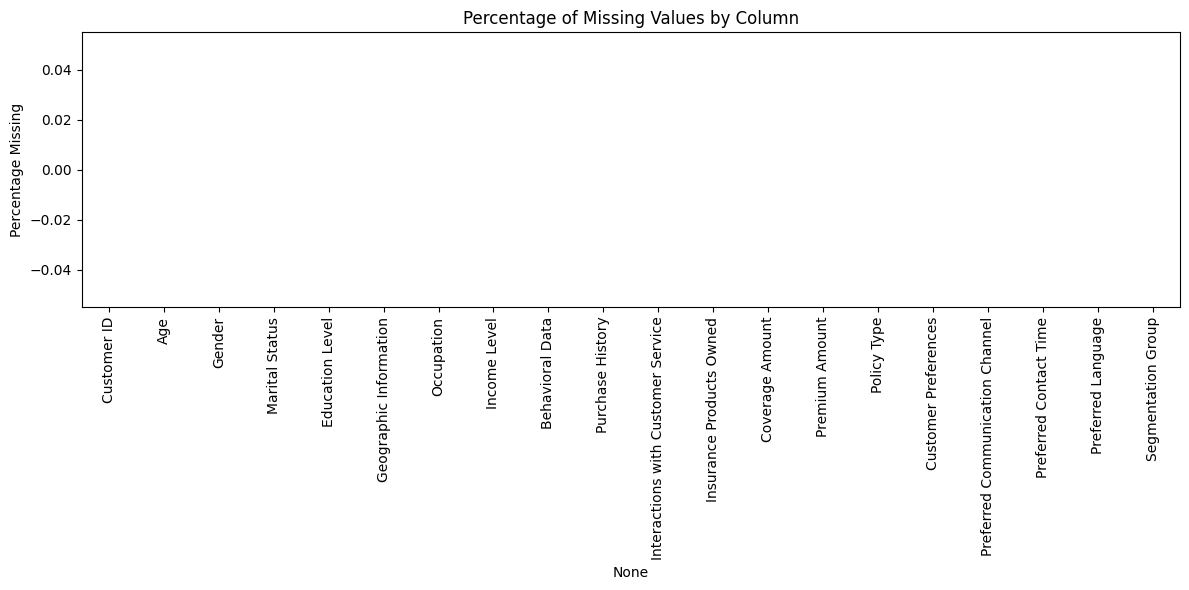

In [16]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_table.index, y='Percentage Missing', data=missing_table)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.tight_layout()
plt.show()